In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv(r"C:\Users\Welcome\Downloads\archive\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [7]:
le = LabelEncoder()

categorical_cols = [
    'gender',
    'race/ethnicity',
    'parental level of education',
    'lunch',
    'test preparation course'
]

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [8]:
df['final_exam_score'] = (
    df['math score'] + df['reading score'] + df['writing score']
) / 3


In [9]:
df.fillna(df.mean(),inplace=True)

In [10]:
X = df[
    [
        'math score',
        'reading score',
        'writing score',
        'gender',
        'race/ethnicity',
        'parental level of education',
        'lunch',
        'test preparation course'
    ]
]


y = df['final_exam_score']


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)


MSE : 1.7739904036610113e-28
RMSE: 1.331912310800156e-14
R²  : 1.0


In [16]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coeff_df


,Feature,Coefficient
0,math score,5.051832e+00
1,reading score,4.864297e+00
2,writing score,5.062686e+00
3,gender,-3.774758e-15
4,race/ethnicity,6.661338e-16
5,parental level of education,-1.498801e-15
6,lunch,2.664535e-15
7,test preparation course,-2.220446e-16


In [17]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coeff_df


,Feature,Coefficient
0,math score,5.051832e+00
1,reading score,4.864297e+00
2,writing score,5.062686e+00
3,gender,-3.774758e-15
4,race/ethnicity,6.661338e-16
5,parental level of education,-1.498801e-15
6,lunch,2.664535e-15
7,test preparation course,-2.220446e-16


In [18]:
coeff_df.sort_values(by='Coefficient', key=abs, ascending=False)


,Feature,Coefficient
2,writing score,5.062686e+00
0,math score,5.051832e+00
1,reading score,4.864297e+00
3,gender,-3.774758e-15
6,lunch,2.664535e-15
5,parental level of education,-1.498801e-15
4,race/ethnicity,6.661338e-16
7,test preparation course,-2.220446e-16


In [19]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print("Ridge R²:", r2_score(y_test, ridge_pred))


Ridge R²: 0.999999651718534


In [20]:
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print("Lasso R²:", r2_score(y_test, lasso_pred))


Lasso R²: 0.9999855679914085


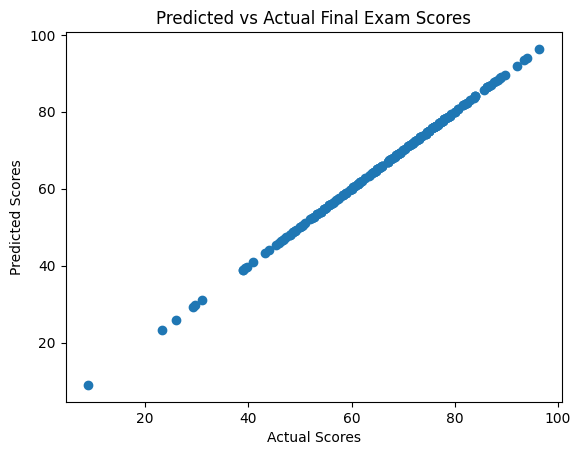

In [21]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Predicted vs Actual Final Exam Scores")
plt.show()


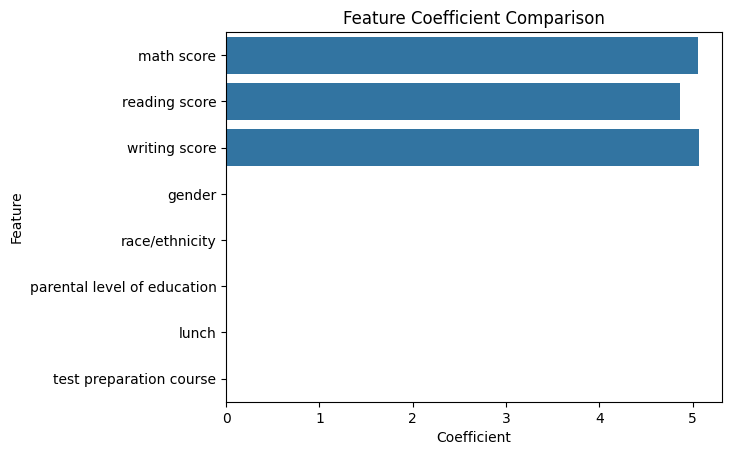

In [22]:
plt.figure()
sns.barplot(x='Coefficient', y='Feature', data=coeff_df)
plt.title("Feature Coefficient Comparison")
plt.show()


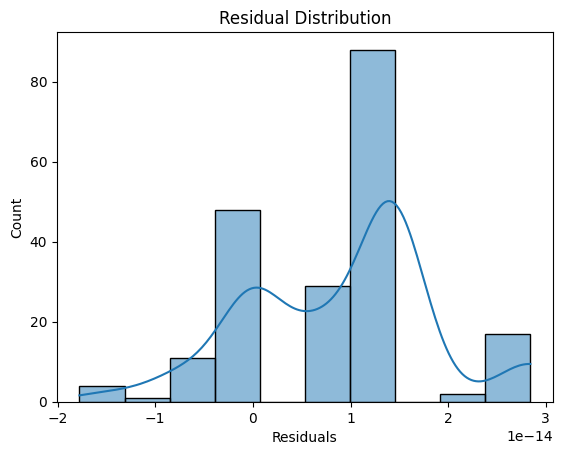

In [23]:
residuals = y_test - y_pred

plt.figure()
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()
